(128, 128) uint8 173 1 82.91729736328125


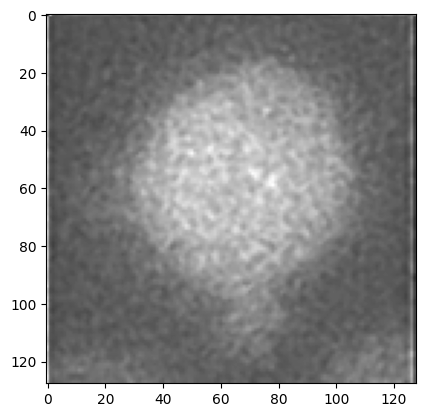

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# read the image
img = cv2.imread("data/Image4045.tif",0)
print (img.shape, img.dtype, img.max(), img.min(), img.mean())
# display the image
imgplot = plt.imshow(img, cmap="gray")

True

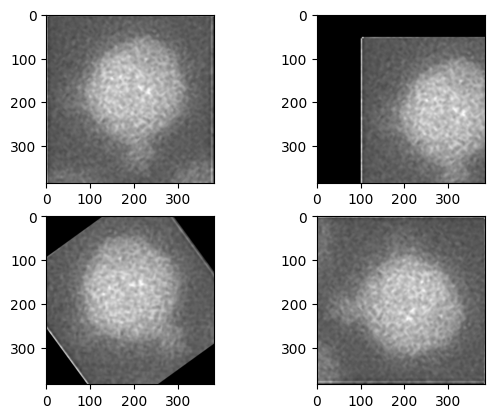

In [4]:
# resize the image
res = cv2.resize(img,None,fx=3, fy=3, interpolation = cv2.INTER_CUBIC)
#scaling 
rows,cols = res.shape
plt.subplot(221)
imgplot = plt.imshow(res, cmap="gray")
# applly geometrical transformation
# make a shift of (100,50)
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(res,M,(cols,rows))
plt.subplot(222)
imgplot = plt.imshow(dst, cmap="gray")
# rotate the image by 36 degree
M = cv2.getRotationMatrix2D((cols/2,rows/2),36,1)
dst = cv2.warpAffine(res,M,(cols,rows))
plt.subplot(223)
imgplot = plt.imshow(dst, cmap="gray")
# rotate 270 degree
M = cv2.getRotationMatrix2D((cols/2,rows/2),270,1)
dst = cv2.warpAffine(res,M,(cols,rows))
plt.subplot(224)
imgplot = plt.imshow(dst, cmap="gray")
# write an image and save it
filename = 'savedImage.jpg'
cv2.imwrite(filename, dst)

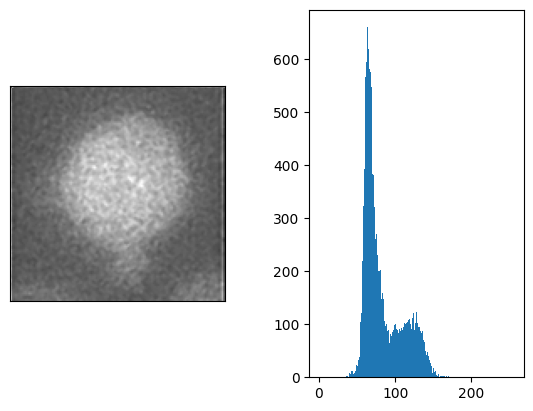

In [5]:
img = cv2.imread("data/Image4045.tif",0)
rows,cols = img.shape
# Histogram 
hist = cv2.calcHist([img],[0],None,[256],[0,256])
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.tight_layout(pad=3.0)
plt.subplot(121)
imgplot = plt.imshow(img, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.hist(img.ravel(),256,[0,256]); plt.show()

(([], []), ([], []))

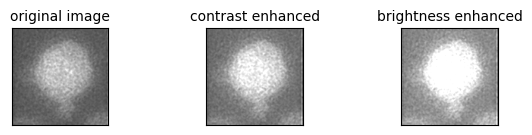

In [7]:
# contrast and brightness enhancement
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)
cntr_adjusted = cv2.convertScaleAbs(img, alpha=1.8,
beta=0)
brght_adjusted = cv2.convertScaleAbs(img, alpha= 1.8,
beta=50)
figure, axes = plt.subplots(nrows=1, ncols=3)
figure.tight_layout(pad=4.0)
plt.subplot(131)
imgplot = plt.imshow(img, cmap="gray")
plt.title('original image', fontsize = '10')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
imgplot = plt.imshow(cntr_adjusted, cmap="gray")
plt.title('contrast enhanced', fontsize = '10')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
imgplot = plt.imshow(brght_adjusted, cmap="gray")
plt.title('brightness enhanced', fontsize = '10')
plt.xticks([]), plt.yticks([])

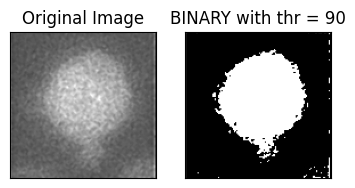

In [9]:
# thresholding
ret,thresh1 = cv2.threshold(img,90,255,cv2.THRESH_BINARY)
titles = ['Original Image','BINARY with thr = 90']
images = [img, thresh1]
for i in range(2):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

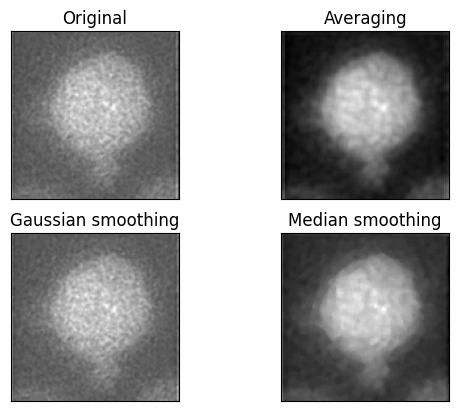

In [10]:
# smoothing image
kernel = np.ones((5,5),np.float32)/25
average_blur = cv2.filter2D(img,-1,kernel)
gaussian_blur = cv2.GaussianBlur(img,(5,5),0.2)
median_blur = cv2.medianBlur(img,5)
plt.subplot(221),plt.imshow(img,cmap="gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(average_blur,cmap="gray"),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(gaussian_blur,cmap="gray"),plt.title('Gaussian smoothing')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(median_blur,cmap="gray"),plt.title('Median smoothing')
plt.xticks([]), plt.yticks([])
plt.show() 

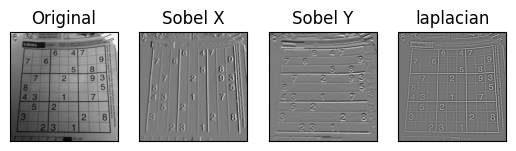

In [12]:
# gradient calculation
img = cv2.imread('data/sudoku-original.jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=11)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=11)
plt.subplot(141),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(laplacian,cmap = 'gray')
plt.title('laplacian'), plt.xticks([]), plt.yticks([])
plt.show() 

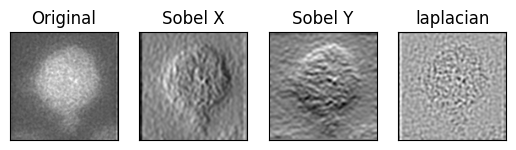

In [16]:
# gradient calculation
img = cv2.imread('data/Image4045.tif',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=11)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=11)
laplacian = cv2.Laplacian(img,cv2.CV_64F,ksize=11)
plt.subplot(141),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(laplacian,cmap = 'gray')
plt.title('laplacian'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

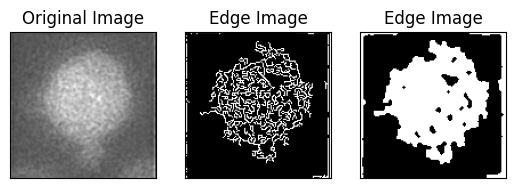

In [17]:
# canny edge detection
edges = cv2.Canny(img,40,130)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
opening = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel,iterations = 1)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])